# Background about Blight Violation in Detroit 
This information is obtained from the link: https://detroitmi.gov/Portals/0/docs/Brochures/DAH/DAH_Citizen_Guide.pdf

### What is a Blight Violation? 
The City of Detroit has ordinances that address how property owners must maintain the exterior of their property. The City issues a blight violation when an owner fails to follow these ordinances. Examples of blight violations that come before the DAH are:
* <b>Property Maintenance</b>: Failure to obtain certificate of compliance or rental registration, failure to maintain exterior of property, failure to comply with emergency order, rat harborage and failure to remove snow and ice.
* <b>Zoning</b>: Violation of special land use grant, change of use of land without permit, change of use of building without a permit, failure to obtain certificate of maintenance of grant conditions.
* <b>Solid Waste & Illegal Dumping</b>: Early or late placement or improper storage of Courville containers, improper set-out during eviction, improper storage of solid, medial or hazardous waste, improper bulk set-out and illegal dumping
 
### Who issues Blight Violation Notices (BVNs)?
Blight Violation Notices (BVNs) are written tickets issued by City inspectors, police officers, and other City officials who investigate complaints of blight. Blight violation notices are issued to property owners or those in control of property that is in violation of the City’s anti-blight ordinances. If a blight violation notice is issued, the person or entity in receipt is called a respondent.
### What happens when a Blight Violation Notice (BVN) is issued?
The written blight violation notice (BVN) received by a respondent will provide a description of the alleged violation and give the hearing date and time. Once a BVN is issued, the following options are available to the respondent who received the BVN:
* Admit responsibility and pay the fine and fees before the DAH hearing date; fine is reduced 10% for early payment.
* Attend the hearing and contest the blight violation, with or without an attorney.
* If a property owner is found responsible at the hearing, the fine and fees imposed must be paid by the hearing date or a 10% penalty is imposed for late payment.

### What is the DAH Hearing Process?
A respondent who receives a blight violation notice has the right to attend a hearing at the DAH. At the hearing, the respondent may present a defense to the blight violation. DAH hearings are presided over by Administrative Hearing Officers who are licensed Michigan attorneys and independent contractors. At the conclusion of the hearing, the Administrative Hearing Officer will make finding of facts and issue a written Decision and Order and Judgment. A Decision and Order and Judgment issued by the DAH is a state civil judgment and is treated the same as any other state court judgment for enforcement purposes

### What if payment is not made?
If an individual ignores a blight violation notice and doesn’t appear at the hearing, a Decision and Order and Judgment by Default will be issued finding the respondent responsible for the blight violation. If a respondent fails to pay the amount of the Decision and Order and Judgment, collection actions will be commenced, which may include the garnishment of wages, attachment of bank accounts and assets, and imposition of judgment liens upon real property.

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

<b>Note</b>: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

#### Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv',encoding = "ISO-8859-1")

/Users/jingjinghuang/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


# Feature Selection

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
# Partition dataset into compliance and non-compliance groups

df_comp    = df[df['compliance'] == 1]
df_NOTcomp = df[df['compliance'] == 0]

No_NOTcomp = df_NOTcomp.shape[0]
No_comp = df_comp.shape[0]

In [32]:
#df_comp

In [23]:
No_NOTcomp

148283

In [8]:
#df['violation_zip_code']

In [11]:
# Delete obviously useless features
# These features are: violation_zip_code ; 
# 

print('violation_zip_code', df['violation_zip_code'].isna().value_counts())
print('violation_zip_code', df['violation_zip_code'].notna().value_counts())

('violation_zip_code', True    250306
Name: violation_zip_code, dtype: int64)
('violation_zip_code', False    250306
Name: violation_zip_code, dtype: int64)


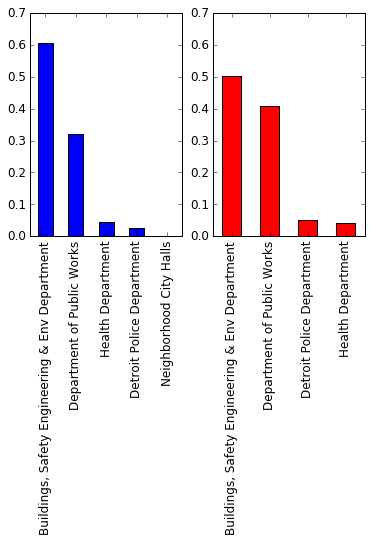

In [29]:
# Check the column, agency_name
# It seems agency_name is not indicative of compliance 
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_ylim([0, 0.7])
ax2.set_ylim([0, 0.7])

(df_NOTcomp['agency_name'].value_counts(normalize=False)/No_NOTcomp).plot.bar(ax=ax1, fontsize=12,color='blue')
(df_comp['agency_name'].value_counts(normalize=False)/No_comp).plot.bar(ax=ax2, fontsize=12,color='red')

In [131]:
# some inspectors issue blight tickets that
# are more likely to be subject to compliance than others;
# these inspectors may be very strict and responsible

df_filter = df [df['compliance'].notnull()]
df_filter = df_filter[['inspector_name','compliance']]

df_inpsectors = df_filter.groupby('inspector_name').agg(['mean','count']) 
df_inpsectors_sort = df_inpsectors.sort_values(by=[('compliance','mean')],ascending=False)

df_inpsectors_sort[df_inpsectors_sort[('compliance','count')] > 50].head(5)
#df_inpsectors_sort[df_inpsectors_sort[('compliance','count')] > 50].tail(5)

compliance      
                        mean count
inspector_name                    
Frinkley, Elaine    0.296875    64
Johnson, Clifford   0.212500   240
Copty, Anton        0.198953   191
Zawislak, Norbet    0.191589   214
Fulks, Matthew g    0.183908    87

### In summary, these features are not used for prediction
* ticket_id
* 
* violation_zip_code 
* agency_name


In [6]:
df.columns

Index([u'ticket_id', u'agency_name', u'inspector_name', u'violator_name',
       u'violation_street_number', u'violation_street_name',
       u'violation_zip_code', u'mailing_address_str_number',
       u'mailing_address_str_name', u'city', u'state', u'zip_code',
       u'non_us_str_code', u'country', u'ticket_issued_date', u'hearing_date',
       u'violation_code', u'violation_description', u'disposition',
       u'fine_amount', u'admin_fee', u'state_fee', u'late_fee',
       u'discount_amount', u'clean_up_cost', u'judgment_amount',
       u'payment_amount', u'balance_due', u'payment_date', u'payment_status',
       u'collection_status', u'grafitti_status', u'compliance_detail',
       u'compliance'],
      dtype='object')

In [8]:
columns_filter = ['violation_street_number', 'violation_street_name', 'violation_zip_code', 'city', \
                 'state', 'zip_code', '']

In [12]:
#df[feature_columns].shape

In [15]:
df_comp    = df[df['compliance'] == True]
df_NOTcomp = df[df['compliance'] == 0]

In [24]:
df['compliance'].value_counts()

0.0    148283
1.0     11597
Name: compliance, dtype: int64

In [28]:
columns_list = df.columns.tolist()

In [46]:
#for col in columns_list:
#    print(df[col].value_counts())